Let's do some exploratory analysis on store sales data. Let's load and combine the data first.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series, DataFrame, concat

In [9]:
def build_dataset():
    #LOAD DATA
    features_data = pd.read_csv('~/Projects/Store_sales/Features_data_set.csv').fillna('VK')
    sales_data = pd.read_csv('~/Projects/Store_sales/sales_data_set.csv').fillna('VK')
    stores_data = pd.read_csv('~/Projects/Store_sales/stores_data_set.csv').fillna('VK')

    #MERGE DATA INTO A SINGLE DATA SET
    features_data.drop('IsHoliday', axis = 1, inplace = True)
    data = pd.merge(sales_data, stores_data, on='Store')
    data = pd.merge(data, features_data, on=['Store', 'Date'])
    del(features_data, sales_data, stores_data)

    #REPLACE DATE STRING WITH DATETIME
    data['Date'] = pd.Series([datetime.strptime(d, '%d/%m/%Y') for d in data['Date']])
    
    #ADD YEAR, MONTH AND WEEK COLUMNS
    data['Year'] = pd.Series([t.year for t in data['Date']])
    data['Month'] = pd.Series([t.month for t in data['Date']])
    '''there is a slight inconsistency here because of a leap year and the 
    defnintion of the sales week depending on what week day the year starts;
    however given the dates are all fridays the datetime week function does
    a good job assigning week numbers'''
    data['Week'] = pd.Series([t.week for t in data['Date']])

    return data

In [3]:
data = build_dataset()

Let's take a look now what this data set contains.

In [4]:
data.describe(include = 'all')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
count,421570.000000,421570.000000,421570,421570.000000,421570,421570,421570.000000,421570.000000,421570.000000,421570,421570,421570,421570,421570,421570.000000,421570.000,421570.000000,421570.000000,421570.000000
unique,NaN,NaN,143,NaN,2,3,NaN,NaN,NaN,2278,1500,1663,1945,2294,2145.000000,349.000,NaN,NaN,NaN
top,NaN,NaN,2011-12-23 00:00:00,NaN,False,A,NaN,NaN,NaN,VK,VK,VK,VK,VK,129.855533,8.099,NaN,NaN,NaN
freq,NaN,NaN,3027,NaN,391909,215478,NaN,NaN,NaN,270889,310322,284479,286603,270138,711.000000,5152.000,NaN,NaN,NaN
first,NaN,NaN,2010-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2012-10-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,NaN,136727.915739,60.090059,3.361027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.968591,6.449510,25.826762
std,12.785297,30.492054,NaN,22711.183519,NaN,NaN,60980.583328,18.447931,0.458515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.796876,3.243217,14.151887
min,1.000000,1.000000,NaN,-4988.940000,NaN,NaN,34875.000000,-2.060000,2.472000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,1.000000,1.000000
25%,11.000000,18.000000,NaN,2079.650000,NaN,NaN,93638.000000,46.680000,2.933000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,4.000000,14.000000


In [5]:
data.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1               object
MarkDown2               object
MarkDown3               object
MarkDown4               object
MarkDown5               object
CPI                     object
Unemployment            object
Year                     int64
Month                    int64
Week                     int64
dtype: object

Now it would be interesting to take a look at an individual store just to make sense we are clear as to what the building block of the data set represents. Let's select store 1 and see what we got. We will show two separate graphs just to keep the spatial presentation under control:

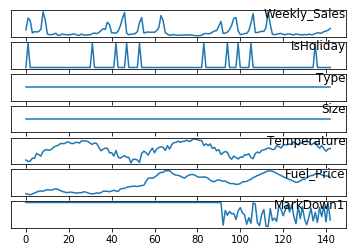

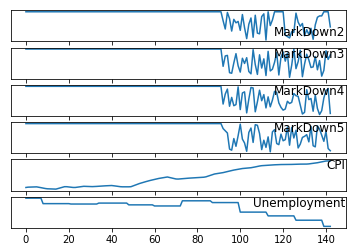

In [11]:
select_store = 1
select_dept = 1
data_df = data.loc[(data['Store'] == select_store) & (data['Dept'] == select_dept)]

#PLOT SELECTED COLUMNS FOR THE SELECTED STORE - FIRST GROUP
values = data_df.values
to_plot = [ 3, 4, 5, 6, 7, 8, 9]
i = 1

plt.figure()
for item in to_plot:
    plt.subplot(len(to_plot), 1, i)
    plt.plot(values[:, item])
    plt.yticks([])
    plt.title(data_df.columns[item], y=0.5, loc='right')
    i += 1
plt.show()

#AND THEN SECOND GROUP
to_plot = [10, 11, 12, 13, 14, 15]
i = 1
# plot each column
plt.figure()
for item in to_plot:
    plt.subplot(len(to_plot), 1, i)
    plt.plot(values[:, item])
    plt.yticks([])
    plt.title(data.columns[item], y=0.5, loc='right')
    i += 1
plt.show()

I think it gives some good idea as to what should be useful here - weekly sales for sure, IsHoliday factor perhaps, and maybe some other values for hygene (e.g. CPI, unemployment, etc.) but perhaps these won't really swing the results. I don't quite understand the nature of MarkDowns and what they represent and I don't think I will use them in the analysis anyway for this reason, and because they are only only available for 1/3 of the time series.

I also think that given the seasonal nature of the data, it would be important to add number of the week to the data set. Sales spikes occur in week 47 and 51 and we should be able to capture this.

Now let's look at some other useful things.

In [19]:
#THE NUMBER OF UNIQUE STORES
print('The number of unique stores:')
data['Store'].nunique()


The number of unique stores:


45

In [20]:
#PLOT STORES VS NUMBER OF DEPARTMENTS FOR EACH STORE
def store_plot():
    
    x = data['Store'].unique()
    y = []
    for i in range(len(x)):
        temp_df = data.loc[data['Store'] == i+1]
        y.append(temp_df['Dept'].nunique())
        i += 1


    plt.figure()
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel('stores')
    plt.ylabel('departments')
    plt.show()

In [21]:
#ANNUAL SALES PER STORE
    
df_2010 = data[data['Date'].isin(pd.date_range("2010-01-01", "2010-12-31"))]
df_2011 = data[data['Date'].isin(pd.date_range("2011-01-01", "2011-12-31"))]
df_2012 = data[data['Date'].isin(pd.date_range("2012-01-01", "2012-12-31"))]

x = data['Week'].unique()
x = df_2010['Week'].unique()
y = df_2010.groupby('Week')['Weekly_Sales'].sum()


In [22]:
#build table aggregating sales by year and week
annual_sales_df = pd.concat([df_2010.groupby('Week')['Weekly_Sales'].sum(), df_2011.groupby('Week')['Weekly_Sales'].sum()], axis = 1)    
annual_sales_df = pd.concat([annual_sales_df, df_2012.groupby('Week')['Weekly_Sales'].sum()], axis = 1)
annual_sales_df.columns = ['2010', '2011', '2012']


And now let's take a look at the plot showing all aggregated sales by week of the year.

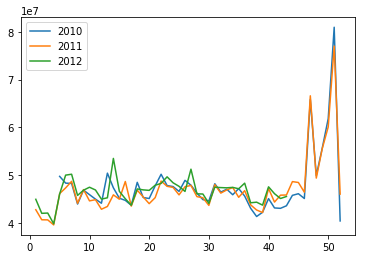

In [24]:
plt.figure()
plt.plot(annual_sales_df['2010'])
plt.plot(annual_sales_df['2011'])
plt.plot(annual_sales_df['2012'])
plt.legend(loc='upper left')
plt.show()

It would be helpful at this stage to also look separately at each year aggregate sales, 2010, 2011 and 2012:

(1, 52)

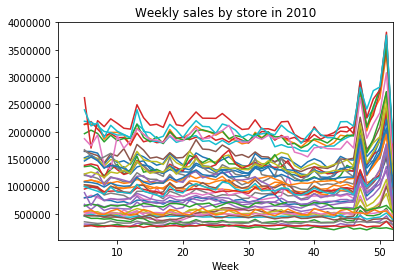

In [25]:
df_2010.groupby(['Week', 'Store']).sum()['Weekly_Sales'].unstack().plot(legend = None)
plt.title('Weekly sales by store in 2010')
plt.xlim(1,52)

(1, 52)

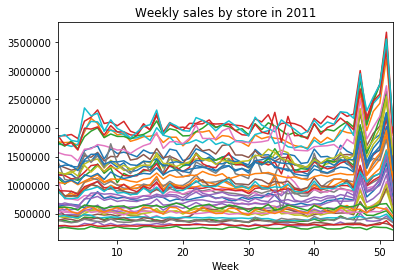

In [26]:
df_2011.groupby(['Week', 'Store']).sum()['Weekly_Sales'].unstack().plot(legend = None)
plt.title('Weekly sales by store in 2011')
plt.xlim(1,52)


(1, 52)

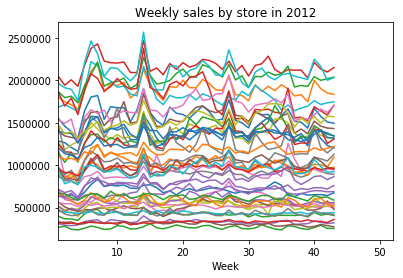

In [27]:
df_2012.groupby(['Week', 'Store']).sum()['Weekly_Sales'].unstack().plot(legend = None)
plt.title('Weekly sales by store in 2012')
plt.xlim(1,52)

I think these graphs give a pretty complete picture of the data: we have incomplete year 2010 (a few weeks in the beginning) and 2012 (~7 weeks at the end, including all of the holiday season). Now it would be interesting to see if a model can be built that predicts the usual seasonal fluctuation based on the observations from 2010 and 2011. 

I am not going to bother with building a train/test split this time, butinstead will use the full data set as for training. It's pretty clear what we can expect to see in that gap at the end of 2012 graph. 

The purpose here is only to set up a model that would correctly infer the typical sales patterns surrounding the holiday season. LSTM is an ovious model candidate. Given LSTM choice, it would be intresting to:

- make a series of predictions in one go, i.e. make one prediction of
    several weeks, as opposed to a week by week prediction

- experiment with adding different independent variables and their
    effect on the model performance
    
This is exactly what I will try next.